In [52]:
#Importar librerias 
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt 

#Definir funciones
# Funcion Rosenbrock
def rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100*(x[i+1]-x[i]**2)**2+(1-x[i])**2
    return suma
# Funcion wood
def wood(x):
    return sum((
        100*(x[0]*x[0] - x[1])**2,
        (x[0]-1)**2,
        (x[2]-1)**2,
        90*(x[2]*x[2] - x[3])**2,
        10.1*((x[1]-1)**2 + (x[3]-1)**2),
        19.8*(x[1]-1)*(x[3]-1),
        ))
#ultima funcion - funcion3, l: lambda
def funcion3(l, x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

#Funciones de gradiente y Hessiano 
#Implementar gradiente y hessiano como diferencias finitas
#Gradiente 
def grad(x,xx, function, n, h):
    fprime = np.zeros(n)
    for i in range(n):
        x[i] = x[i]+h
        delante = function(x)
        x[i] = x[i]-2*h
        atras = function(x)
        fprime[i] = (delante-atras)/(2*h)
        x = np.copy(xx)
    return fprime

#Hessiano - desarrollado con diferencias finitas
def hessian(x, xx, function, n, h):
    hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            x[i] = x[i]+h 
            x[j] = x[j]+h
            d = function(x)
            x[j] = x[j]-2*h
            a = function(x)
            #regresar al valor de x original
            x = np.copy(xx)

            x[i] = x[i]-h 
            x[j] = x[j]+h
            dd = function(x)
            x[j] = x[j]-2*h
            aa = function(x)
            #regresar al original
            x = np.copy(xx)
            
            #llenar matriz
            hessian[i][j] = (d-a-dd+aa)/(4*h*h)

    return hessian

def steepest_descent(function, x, alpha, n, h, TOL, iteraciones):
    fun = []
    norm = []
    for i in range(iteraciones):
        #print("sd i: ", i)
        g0 = grad(x, x, function, n, h)
        fun.append(function(x))
        norm.append(np.linalg.norm(g0))
        #reemplazar el valor de x
        x = x-alpha*g0/np.linalg.norm(g0)
        if np.linalg.norm(g0) < TOL:
            #regresar por la tolerancia
            return x, norm, fun,  i+1
    return x, norm, fun, iteraciones

In [2]:
#Sufficient decrease and Backtracking
def backtracking(x, function, a, rho, c1, h):
    #obtener el alpha utilizando backtracking
    n = len(x)
    g0 = grad(x, x, function, n, h)
    d = -g0 #gradiente
    alpha = a
    #condicion del algoritmo
    while (function(x+alpha*d)) > (function(x) + c1*alpha*np.dot(g0,d)):
        g0 = grad(x, x, function, n, h)
        alpha = rho*alpha
    return alpha

# FUNCION ROSENBROCK N = 2

El minimo es:  [-1.037783    1.08310546]  con alpha:  0.0002


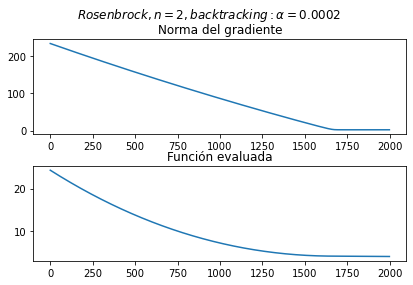

In [26]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
x = [-1.2, 1]
n = 2
h = 0.0001 #valor para el gradiente
alpha_init = 0.02
c1 = 10e-4
rho = 0.1
max_iter = 2000
TOL = 10e-5

alpha_back = backtracking(x, rosenbrock, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=2, backtracking: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_2_backtracking_punto_inicial.png')

alpha_back:  0.0020000000000000005
El punto minimo es:  [0.95541702 0.91514251]


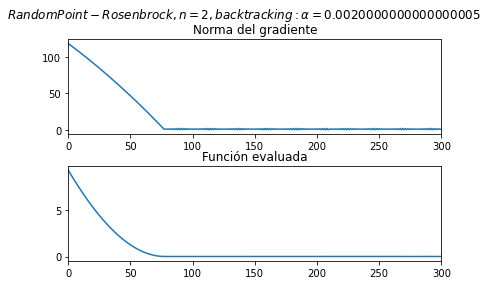

In [19]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto aleatorio
n = 2
x = np.random.rand(n)
h = 0.0001 #valor para el gradiente
alpha_init = 0.2
c1 = 10e-4
rho = 0.1
max_iter = 1000
TOL = 10e-5

alpha_back = backtracking(x, rosenbrock, alpha_init, rho, c1, h)
print("alpha_back: ", alpha_back)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El punto minimo es: ", x_back)
#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$RandomPoint - Rosenbrock, n=2, backtracking: \alpha = {} $'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
axs[0].set_xlim(0, 300)
axs[1].set_xlim(0, 300)
plt.savefig('rosenbrock_n_2_backtracking_punto_aleatorio.png')

# FUNCION ROSENBROCK N = 100

El punto minimo es:  [-0.99347266  0.99679206  0.99840586  0.99919693  0.99961149  0.9997913
  0.99991439  0.99993558  0.99999296  0.9999681   1.00001575  0.99997292
  1.00002463  0.99997094  1.00002996  0.99996737  1.00003432  0.9999635
  1.00003832  0.99995968  1.00004211  0.99995599  1.00004572  0.99995248
  1.00004913  0.99994916  1.00005235  0.99994605  1.00005535  0.99994316
  1.00005812  0.9999405   1.00006065  0.99993808  1.00006294  0.99993592
  1.00006497  0.99993402  1.00006673  0.99993239  1.00006822  0.99993103
  1.00006944  0.99992995  1.00007037  0.99992917  1.00007101  0.99992866
  1.00007137  0.99992845  1.00007143  0.99992854  1.00007121  0.99992891
  1.00007069  0.99992957  1.00006989  0.99993051  1.00006881  0.99993174
  1.00006744  0.99993324  1.00006581  0.99993501  1.00006391  0.99993705
  1.00006175  0.99993934  1.00005934  0.99994187  1.00005669  0.99994464
  1.00005381  0.99994763  1.00005072  0.99995083  1.00004743  0.99995422
  1.00004394  0.99995779  1.0000

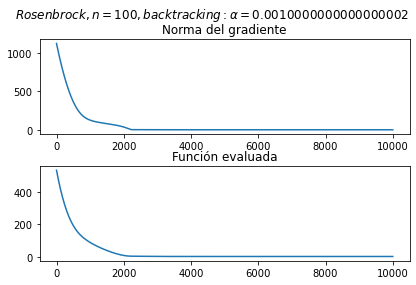

In [20]:
#Para n = 100, funcion rosenbrock con BACKTRACKING
#punto inicial
n = 100
x = np.ones(n)
x[0] = -1.2
x[n-2] = -1.2

h = 0.0001 #valor para el gradiente
alpha_init = 0.1
c1 = 10e-4
rho = 0.1
max_iter = 10000
TOL = 10e-5

alpha_back = backtracking(x, rosenbrock, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El punto minimo es: ", x_back, " con alpha igual a: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=100, backtracking: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_100_backtracking_punto_inicial.png')

El punto minimo es:  [0.999184   0.99954466 0.99977332 0.99988638 0.99994147 0.99996673
 0.99997509 0.9999709  0.9999522  0.99990981 0.99982277 0.99964804
 0.99929925 0.99860413 0.99721995 0.99446678 0.98900223 0.97820109
 0.95702795 0.91620159 0.84001759 0.70679419 0.50181468 0.25604311
 0.07279189 0.01498374 0.01031715 0.01021044 0.01020846 0.01020842
 0.01020842 0.01020842 0.01020842 0.01020842 0.01020842 0.01020845
 0.01020999 0.01028779 0.01419498 0.15539031 0.51134175 0.73557861
 0.86253799 0.92996993 0.96468233 0.98227845 0.99113024 0.99556619
 0.99778486 0.99889327 0.99944634 0.99972144 0.99985667 0.99991994
 0.99994308 0.99993781 0.99990164 0.99981676 0.9996412  0.99928819
 0.99858338 0.9971793  0.99438632 0.9888429  0.97788716 0.95641609
 0.91503518 0.83789014 0.70324102 0.49683551 0.25112388 0.07036596
 0.01466081 0.0103085  0.01021028 0.01020846 0.01020843 0.01020852
 0.01021356 0.01047784 0.02402316 0.31961743 0.60916964 0.79029812
 0.89118008 0.94443788 0.97181324 0.98565

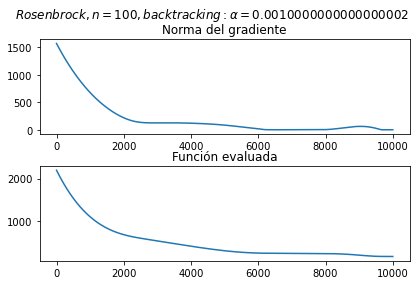

In [24]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
n = 100
x = np.random.rand(n)

h = 0.0001 #valor para el gradiente
alpha_init = 0.1
c1 = 10e-4
rho = 0.1
max_iter = 10000
TOL = 10e-5

alpha_back = backtracking(x, rosenbrock, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(rosenbrock, x, alpha_back, n, h, TOL, max_iter)
print("El punto minimo es: ", x_back, " con alpha igual a: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Rosenbrock, n=100, backtracking: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('rosenbrock_n_100_backtracking_punto_aleatorio.png')

# FUNCION WOOD

El minimo es:  [-1.12213927  1.26673179  0.83331886  0.69489791]  con alpha:  0.00030000000000000003


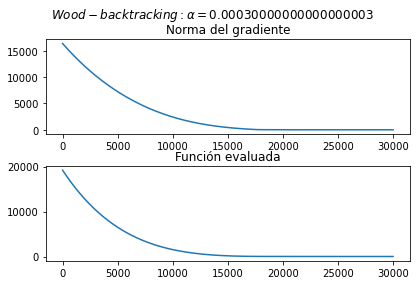

In [48]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
x = [-3, -1, -3, -1]
n = 4
h = 0.0001 #valor para el gradiente
alpha_init = 0.03
c1 = 10e-4
rho = 0.1
max_iter = 30000
TOL = 10e-10

alpha_back = backtracking(x, wood, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(wood, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Wood - backtracking: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('wood_backtracking_punto_inicial.png')

## Punto aleatorio wood

El minimo es:  [0.98984777 0.97396746 1.01208793 1.02412046]  con alpha:  0.003


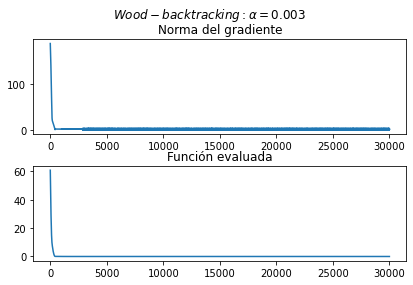

In [51]:
#Para n = 2, funcion rosenbrock con BACKTRACKING
#punto inicial
#Condiciones
n = 4
x = np.random.rand(n)
h = 0.0001 #valor para el gradiente
alpha_init = 0.03
c1 = 10e-4
rho = 0.1
max_iter = 30000
TOL = 10e-10

alpha_back = backtracking(x, wood, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(wood, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
fig, axs = plt.subplots(2)
plt.suptitle(r'$Wood - backtracking: \alpha = {}$'.format(alpha_back))
axs[0].plot(norm_back)
fig.tight_layout()
axs[0].set_title("Norma del gradiente")
axs[1].plot(fun_back)
axs[1].set_title("Función evaluada")
plt.savefig('wood_backtracking_punto_aleatorio.png')

# Ultima funcion - función 3

In [80]:
n = 128
#ultima funcion - funcion3, l: lambda
# para lambda = 1
l = 100
sigma = 5
def funcion3(x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

El minimo es:  [-1.05008381e-03  4.94442203e-08 -3.75220892e-08  2.86807333e-08
 -8.58846616e-08  2.73261979e-07  1.04158570e-07  2.85615630e-08
 -1.93422722e-07  8.92809941e-08 -7.64626506e-08 -1.30559355e-07
  2.15170363e-07  3.15505611e-07 -3.72383031e-08 -1.08041756e-07
 -5.94186143e-08  1.35507975e-07  4.87795713e-08  8.88956084e-08
  1.21718593e-07 -2.79808421e-07  1.39455333e-07 -7.85663596e-08
  1.41943173e-07 -2.69173036e-07 -2.21277533e-07 -9.51290784e-08
  1.50720971e-07  8.34026604e-08  9.20007884e-08 -5.90726036e-08
 -8.76816274e-08  6.42179846e-09  2.87371249e-07  8.42877080e-08
 -2.01241513e-07  1.87635516e-07 -1.08091995e-07  1.70426230e-09
 -3.89061377e-08  5.47653416e-08 -1.51703471e-07  2.71148522e-07
 -1.81898326e-07  1.19558869e-07 -3.90689208e-08 -9.74668602e-08
  2.19742445e-08 -8.39992682e-08  1.31219671e-07 -7.80721098e-08
  6.17028937e-08 -7.45768668e-08  1.83344681e-07 -4.02603896e-08
  4.39360811e-07 -1.80198733e-07  1.60921618e-07  1.73538380e-07
  1.779951

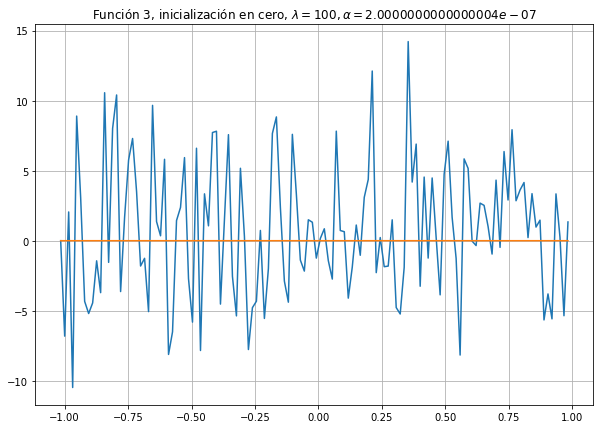

In [81]:
#Para n = 128
#Condiciones
n = 128

#para graficar
t = np.zeros(n)
y = np.zeros(n)
for i in range (n):
    t[i] = ((2/(n-1))*(i-1)-1)
for i in range(1, n):
    y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

#parametros para la funcion
x = np.zeros(n)
h = 0.00001 #valor para el gradiente
alpha_init = 0.002
c1 = 10e-4
rho = 0.1
max_iter = 100
TOL = 10e-4

alpha_back = backtracking(x, funcion3, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(funcion3, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
plt.figure(figsize = (10, 7))
plt.plot(t, y, label = 't, y')
plt.plot(t, x_back, label = r't, $x^{*}$')
plt.grid()
plt.title(r'Función 3, inicialización en cero, $\lambda = 100, \alpha = {} $'.format(alpha_back))
plt.savefig("Funcion3_vector_inicial_lamba100.png")

## Función 3: con inicialización aleatoria

In [86]:
n = 128
#ultima funcion - funcion3, l: lambda
# para lambda = 1
l = 100
sigma = 5
def funcion3(x):
    n = len(x)
    t = np.zeros(n)
    y = np.zeros(n)
    for i in range (n):
        t[i] = ((2/(n-1))*(i-1)-1)
    for i in range(1, n):
        y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

El minimo es:  [0.27335718 0.82697738 0.15523534 0.28931742 0.54929421 0.36014804
 0.92044027 0.72065822 0.6201662  0.14165191 0.52172687 0.89285336
 0.5946689  0.70520294 0.82190137 0.20030152 0.40555769 0.29146174
 0.39328855 0.53339594 0.46049325 0.40552836 0.19634527 0.49246447
 0.99306645 0.36448096 0.75005024 0.27057632 0.67523895 0.31867346
 0.49876661 0.29505921 0.18488934 0.74289604 0.42201791 0.60323048
 0.21845227 0.18268153 0.96491246 0.58896069 0.16291423 0.75659926
 0.66683493 0.18051423 0.05719987 0.4440126  0.89266136 0.08076464
 0.24066007 0.12604975 0.75837923 0.26052269 0.17427045 0.67187739
 0.5173683  0.31823307 0.26711172 0.67583195 0.67278823 0.85476972
 0.69326011 0.48333228 0.3634351  0.87704791 0.5124941  0.65987188
 0.74120408 0.74890681 0.47648848 0.52018535 0.39175684 0.84493422
 0.00786086 0.74278272 0.91647957 0.08184411 0.79767422 0.6937098
 0.00280224 0.66258897 0.84414197 0.75036172 0.07330154 0.28722399
 0.14958738 0.02403264 0.29070899 0.77420758 0.4

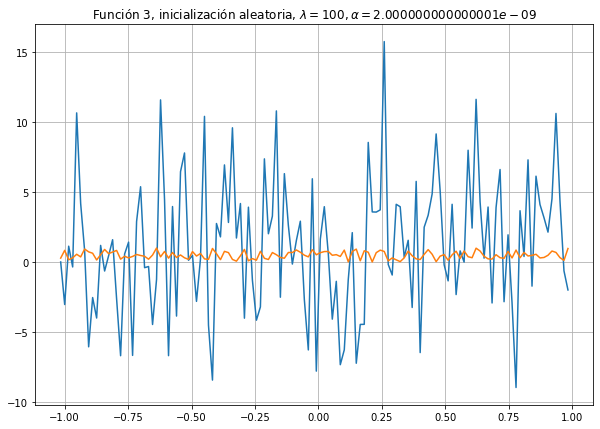

In [87]:
#Para n = 128
#Condiciones
n = 128

#para graficar
t = np.zeros(n)
y = np.zeros(n)
for i in range (n):
    t[i] = ((2/(n-1))*(i-1)-1)
for i in range(1, n):
    y[i] = t[i]**2 + np.random.normal(0, sigma) #y aleatoria

#parametros para la funcion
x = np.random.rand(n)
h = 0.00001 #valor para el gradiente
alpha_init = 0.002
c1 = 10e-4
rho = 0.1
max_iter = 100
TOL = 10e-4

alpha_back = backtracking(x, funcion3, alpha_init, rho, c1, h)
x_back, norm_back, fun_back, max_iter = steepest_descent(funcion3, x, alpha_back, n, h, TOL, max_iter)
print("El minimo es: ", x_back, " con alpha: ", alpha_back)

#Graficar 
plt.figure(figsize = (10, 7))
plt.plot(t, y, label = 't, y')
plt.plot(t, x_back, label = r't, $x^{*}$')
plt.grid()
plt.title(r'Función 3, inicialización aleatoria, $\lambda = 100, \alpha = {} $'.format(alpha_back))
plt.savefig("Funcion3_vector_aleatorio_backtracking_lambda100.png")